<a href="https://colab.research.google.com/github/littlecanargie/EpidemicModeling/blob/main/20210126_Practice_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machinery (takes some time)

## Base packages

In [ ]:
libraries = c("dplyr", "magrittr", "tidyr", "ggplot2", "readxl")  
for(x in libraries) { library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE) }

install.packages("zoo"); library("zoo")

R.Version()$version.string

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "R version 4.0.3 (2020-10-10)"

In [ ]:
# Data hub for COVID19 datasets
## install the package
install.packages("COVID19")
## load the package
library("COVID19")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Stan

In [ ]:
# Step 1: install CmdStanR and only the packages that it directly depends on.
install.packages('versions')
library(versions)
# Install package CmdStanR from GitHub
library(devtools)
if(!require(cmdstanr)){
  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
  library(cmdstanr)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



posterior  (NA -> 2c0a2f111...) [GitHub]
checkmate  (NA -> 2.0.0       ) [CRAN]
abind      (NA -> 1.4-5       ) [CRAN]
data.table (NA -> 1.13.6      ) [CRAN]


checkmate (NA -> 2.0.0) [CRAN]
abind     (NA -> 1.4-5) [CRAN]


Installing 2 packages: checkmate, abind

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpU3qKTe/remotes414ed8f961/stan-dev-posterior-2c0a2f1/DESCRIPTION’
─  preparing ‘posterior’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘posterior_0.1.3.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 3 packages: checkmate, abind, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'posterior' from a github remote, the SHA1 (2c0a2f11) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpU3qKTe/remotes4173712bc9/stan-dev-cmdstanr-9bc4cb4/DESCRIPTION’
─  preparing ‘cmdstanr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘cmdstanr_0.3.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.3.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



In [ ]:
# Step 2: download and untar the CmdStan binary for Google Colab instances
## Install CmdStan binaries
if (!file.exists("cmdstan-2.23.0.tgz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
list.files("cmdstan-2.23.0")

character(0)

[1] "bin"                "examples"           "install-tbb.bat"   
 [4] "Jenkinsfile"        "lib"                "LICENSE"           
 [7] "make"               "makefile"           "README.md"         
[10] "runCmdStanTests.py" "src"                "stan"              
[13] "test-all.sh"

In [ ]:
# Step 3: Register the CmdStan install location
## Set cmdstan_path to CmdStan installation
set_cmdstan_path("cmdstan-2.23.0")
## helper function
print_file <- function(file, nlines=-1L) {
  cat(paste(readLines(file, n=nlines), "\n", sep=""), sep="")
}

CmdStan path set to: /content/cmdstan-2.23.0



In [ ]:
# will be used for postprocessing
if (!require("devtools")) {
  install.packages("devtools")
}
devtools::install_github("stan-dev/bayesplot")

library(posterior)
library(bayesplot)

brio     (1.1.0 -> 1.1.1) [CRAN]
plyr     (NA    -> 1.8.6) [CRAN]
reshape2 (NA    -> 1.4.4) [CRAN]
ggridges (NA    -> 0.5.3) [CRAN]


Installing 4 packages: brio, plyr, reshape2, ggridges

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpU3qKTe/remotes41515be3a8/stan-dev-bayesplot-665c687/DESCRIPTION’
─  preparing ‘bayesplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘bayesplot_1.8.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is posterior version 0.1.3

This is bayesplot version 1.8.0.9000

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat




# Let's start

In [ ]:
# First we load the data from the Covid19 data hub
## verbose=FALSE here means that we don't want any messages to be print out
df_ = covid19(verbose = FALSE)
df_ %>% head

id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,⋯,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
<chr>,<date>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
AFG,2020-01-22,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-23,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-24,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-25,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-26,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF
AFG,2020-01-27,NA,NA,NA,NA,NA,NA,NA,NA,⋯,AFN,1,Afghanistan,NA,NA,33,65,NA,NA,AF


In [ ]:
# Checking the list of countries available for our analysis
df_$administrative_area_level_1 %>% unique()

[1] "Afghanistan"                          
  [2] "Angola"                               
  [3] "Albania"                              
  [4] "Andorra"                              
  [5] "United Arab Emirates"                 
  [6] "Argentina"                            
  [7] "Armenia"                              
  [8] "American Samoa"                       
  [9] "Antigua and Barbuda"                  
 [10] "Australia"                            
 [11] "Austria"                              
 [12] "Azerbaijan"                           
 [13] "Burundi"                              
 [14] "Belgium"                              
 [15] "Benin"                                
 [16] "Burkina Faso"                         
 [17] "Bangladesh"                           
 [18] "Bulgaria"                             
 [19] "Bahrain"                              
 [20] "Bahamas"                              
 [21] "Bosnia and Herzegovina"               
 [22] "Belarus"                              
 [23] "Belize"                               
 [24] "Bermuda"                              
 [25] "Bolivia"                              
 [26] "Brazil"                               
 [27] "Barbados"                             
 [28] "Brunei"                               
 [29] "Bhutan"                               
 [30] "Botswana"                             
 [31] "Costa Atlantica"                      
 [32] "Central African Republic"             
 [33] "Canada"                               
 [34] "Switzerland"                          
 [35] "Chile"                                
 [36] "China"                                
 [37] "Cote d'Ivoire"                        
 [38] "Cameroon"                             
 [39] "Congo, the Democratic Republic of the"
 [40] "Congo"                                
 [41] "Colombia"                             
 [42] "Comoros"                              
 [43] "Cape Verde"                           
 [44] "Costa Rica"                           
 [45] "Cuba"                                 
 [46] "Cyprus"                               
 [47] "Czech Republic"                       
 [48] "Germany"                              
 [49] "Djibouti"                             
 [50] "Dominica"                             
 [51] "Denmark"                              
 [52] "Dominican Republic"                   
 [53] "Diamond Princess"                     
 [54] "Algeria"                              
 [55] "Ecuador"                              
 [56] "Egypt"                                
 [57] "Eritrea"                              
 [58] "Spain"                                
 [59] "Estonia"                              
 [60] "Ethiopia"                             
 [61] "Finland"                              
 [62] "Fiji"                                 
 [63] "France"                               
 [64] "Gabon"                                
 [65] "United Kingdom"                       
 [66] "Georgia"                              
 [67] "Ghana"                                
 [68] "Guinea"                               
 [69] "Gambia"                               
 [70] "Guinea-Bissau"                        
 [71] "Equatorial Guinea"                    
 [72] "Grand Princess"                       
 [73] "Greece"                               
 [74] "Grenada"                              
 [75] "Guatemala"                            
 [76] "Guam"                                 
 [77] "Guyana"                               
 [78] "Honduras"                             
 [79] "Croatia"                              
 [80] "Haiti"                                
 [81] "Hungary"                              
 [82] "Indonesia"                            
 [83] "India"                                
 [84] "Ireland"                              
 [85] "Iran"                                 
 [86] "Iraq"                                 
 [87] "Iceland"                              


In [ ]:
# Choosing Japan to select one of the subnational units later
df_ = covid19("Japan", level=2, verbose = F)
df_ %>% head

id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,⋯,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_google_mobility,key_apple_mobility,key_numeric,key_alpha_2
<chr>,<date>,<lgl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
03cb0211,2020-01-15,NA,NA,0,NA,0,NA,NA,NA,⋯,Japan,Nara,NA,NA,NA,NA,NA,NA,29,NA
03cb0211,2020-01-16,NA,NA,0,NA,0,NA,NA,NA,⋯,Japan,Nara,NA,NA,NA,NA,NA,NA,29,NA
03cb0211,2020-01-17,NA,NA,0,NA,0,NA,NA,NA,⋯,Japan,Nara,NA,NA,NA,NA,NA,NA,29,NA
03cb0211,2020-01-18,NA,NA,0,NA,0,NA,NA,NA,⋯,Japan,Nara,NA,NA,NA,NA,NA,NA,29,NA
03cb0211,2020-01-19,NA,NA,0,NA,0,NA,NA,NA,⋯,Japan,Nara,NA,NA,NA,NA,NA,NA,29,NA
03cb0211,2020-01-20,NA,NA,0,NA,0,NA,NA,NA,⋯,Japan,Nara,NA,NA,NA,NA,NA,NA,29,NA


In [ ]:
# List of countries available for our analysis
df_$administrative_area_level_2 %>% unique()

[1] "Nara"      "Shiga"     "Gifu"      "Yamaguchi" "Tottori"   "Kochi"    
 [7] "Niigata"   "Saitama"   "Yamanashi" "Fukushima" "Oita"      "Fukuoka"  
[13] "Iwate"     "Gunma"     "Kanagawa"  "Aomori"    "Saga"      "Miyazaki" 
[19] "Yamagata"  "Fukui"     "Wakayama"  "Hiroshima" "Ehime"     "Hyogo"    
[25] "Nagano"    "Mie"       "Tokushima" "Shimane"   "Kyoto"     "Shizuoka" 
[31] "Miyagi"    "Okinawa"   "Kumamoto"  "Toyama"    "Ibaraki"   "Chiba"    
[37] "Hokkaido"  "Nagasaki"  "Kagoshima" "Akita"     "Tokyo"     "Tochigi"  
[43] "Ishikawa"  "Aichi"     "Osaka"     "Okayama"   "Kagawa"

In [ ]:
# Selecting one of the preferecture, then keeping only relevant columns and removing the index column "id"
## Actually we need only confirmed cases
df_ %>% filter(administrative_area_level_2=="Tokyo") %>%
  ungroup %>% select(-id) %>% select(date, confirmed, deaths) -> df
df %>% tail

date,confirmed,deaths
<date>,<dbl>,<int>
2021-01-20,89188,754
2021-01-21,90659,761
2021-01-22,91834,770
2021-01-23,92904,779
2021-01-24,93890,782
2021-01-25,93890,782


In [ ]:
# First date with non-zero count
## Notice: if I take the exression in paranthesis, it will be automatically printed out
(df %>% filter(confirmed>0) %>% head(1) %>% .$date -> mindate)

[1] "2020-01-24"

In [ ]:
df %>% filter(date >= mindate) %>% 
  # here we calculate the incidence because we have initially the cumulative incidence
  ## so from each row we substract the previous one, and if the row is the first one we assume that the previous row equals zero
  ## this done by writing the "default=0" inside the lag function
  mutate(across(c("confirmed","deaths"), ~(. - lag(., default=0)))) %>%
  # here we calculate the rolling average over seven days
  ## "partial=TRUE" means that if we have a shorter window than we use partial mean
  ## see: https://stackoverflow.com/questions/48346685/rollapply-mean-with-fill-as-smaller-window-when-doesnt-fit 
  mutate(confirmed_rolling_average = zoo::rollapply(confirmed, 7, mean, align="right", fill=NA, partial = TRUE)) -> Df
(Df %>% head)
Df %>% tail

date,confirmed,deaths,confirmed_rolling_average
<date>,<dbl>,<dbl>,<dbl>
2020-01-24,1,0,1.0000000
2020-01-25,1,0,1.0000000
2020-01-26,0,0,0.6666667
2020-01-27,0,0,0.5000000
2020-01-28,0,0,0.4000000
2020-01-29,0,0,0.3333333


date,confirmed,deaths,confirmed_rolling_average
<date>,<dbl>,<dbl>,<dbl>
2021-01-20,1274,10,1517.429
2021-01-21,1471,7,1513.000
2021-01-22,1175,9,1395.000
2021-01-23,1070,9,1289.429
2021-01-24,986,3,1202.857
2021-01-25,0,0,1030.857


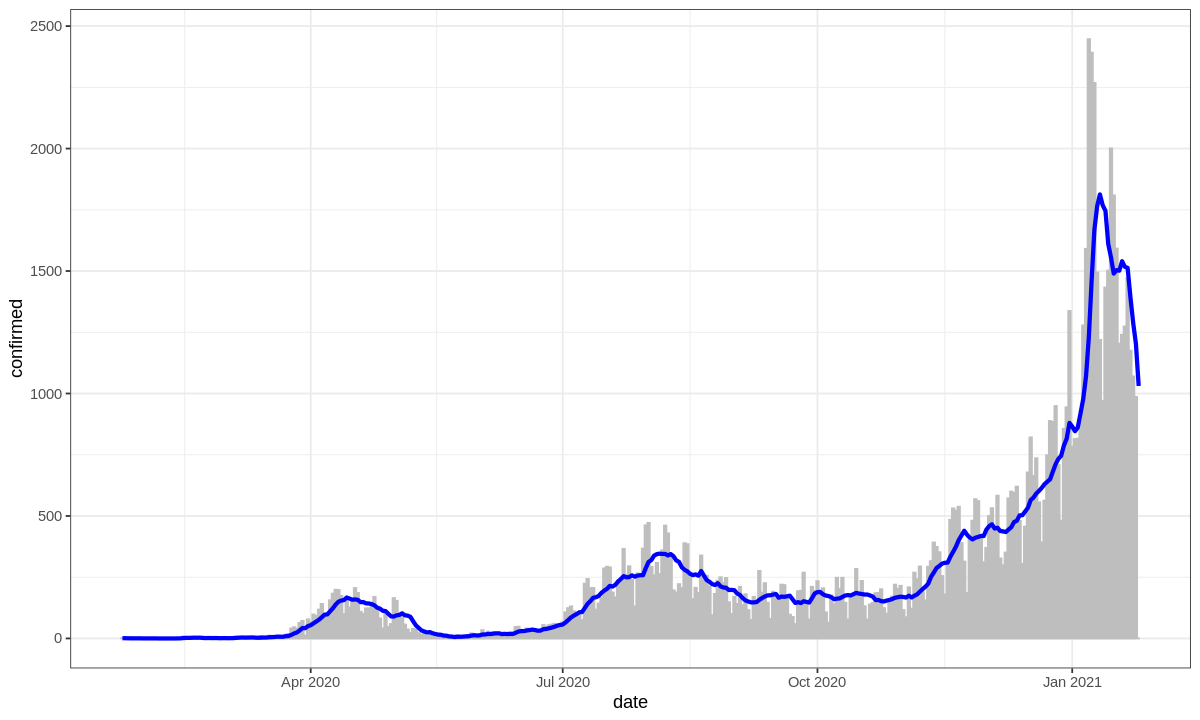

In [ ]:
# plotting
options(repr.plot.width=10, repr.plot.height=6)
Df %>% ggplot(aes(x=date, y=confirmed)) + geom_bar(stat="identity",color="grey", fill="grey") + 
  geom_line(aes(y=confirmed_rolling_average), color="blue", size=1.2) +
  theme_bw()

# Stan implementation

## 1. **Wrong**: when we simply put the confirmed counts which gives the effect of weekdays/weekends

In [ ]:
# Stan program
stan_code = "functions {
    /* calculating the convolutions */
    // X: first function, Yrev: reversed version of the second function
    // K: length of X and Yrev
    // the result is the vector of length K-1, because the first element equal zero is omitted
    vector convolution(vector X, vector Yrev, int K) {
        vector[K-1] res;
        res[1] = X[1]*Yrev[K];
        for (k in 2:K-1) 
            res[k] = dot_product(head(X, k), tail(Yrev, k)); // by definition of the convolution

        return res;        
    }
}

data {
 int<lower = 1> K; // number of days
 int<lower = 0> cases[K]; // incidence per day

 // Serial interval
 real param1_SI;
 real param2_SI;
}

transformed data {
  vector[K-1] conv;

  {
    vector[K] gt;
    vector[K] gt_rev; 

    // calculating the discrete version of the weibull distribution
    vector[K] gt_cdf;
    for (i in 1:K) 
      gt_cdf[i] = exp(weibull_lcdf(i | param1_SI, param2_SI));
    gt = append_row(gt_cdf[1], gt_cdf[2:K] - gt_cdf[1:(K-1)]);

    // reverting
    for (i in 1:K)
      gt_rev[i] = gt[K + 1 - i];

    conv = convolution(to_vector(cases), gt_rev, K);
  }
}

parameters {
  // the vector of instantaneous reproduction numbers 
  vector<lower = 0>[K-1] Rt;
}

model {
  // prior distribution
  // if we take flat (non-informative prior), then we would obtain exactly MLE
  Rt ~ normal(2.4, 2.0);

  target += poisson_lpmf(tail(cases, K-1) | Rt .* conv + 1e-8);
  // it is the same as to write: 
  //    tail(cases, K-1) ~ poisson(Rt .* conv + 1e-8)
  // which I showed during the class
  // it is up to you to choose
  // '_pmf' stands for 'probability mass function' b/c Poisson is discrete distribution
}"
stan_file = write_stan_file(stan_code)

# data file
## Serial interval is from Nishiura et al 2020 IJID
## https://doi.org/10.1016/j.ijid.2020.02.060
data_list = list(K = nrow(Df), cases = Df$confirmed, param1_SI = 2.305, param2_SI = 5.452)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

# Compile example model
mod = cmdstan_model(stan_file)

# Condition on data
## seed number is used for possible reproducibility
fit = mod$sample(data = data_file, iter_sampling=1000, iter_warmup=500, chains=3, seed=123) 

Compiling Stan program...



Running MCMC with 3 sequential chains...

Chain 1 Iteration:    1 / 1500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 1 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 1 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 1 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 1 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 1 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 1 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 1 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 1 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 1 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 1 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 1 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 1 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 1 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 1 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 1 finished in 7.2 seconds.
Chain 2 Iteration:    1 / 1500 [  0%]  (Warmup) 
Chain 2 Iteration:  1

In [ ]:
output_ = fit$summary(c("Rt"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_) = c("variable", "Rt", "Rt_lower", "Rt_upper")
output_ %>% head

,variable,Rt,Rt_lower,Rt_upper
,<chr>,<dbl>,<dbl>,<dbl>
1,Rt[1],3.665945,0.87578347,7.238168
2,Rt[2],2.433960,0.16683580,6.032676
3,Rt[3],2.061070,0.14613447,5.619860
4,Rt[4],1.881460,0.09288388,5.422768
5,Rt[5],1.780235,0.08674790,5.126439
6,Rt[6],2.897045,0.55999750,6.314158


In [ ]:
# Here is some technical thing: to extract the number inside the brackets
## for example: Rt[1] will be separated on variable="Rt" and index=1
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), date = mindate + index) %>% 
  select(variable, date, everything(), -index, -variable) -> output
output %>% head

,date,Rt,Rt_lower,Rt_upper
,<date>,<dbl>,<dbl>,<dbl>
1,2020-01-25,3.665945,0.87578347,7.238168
2,2020-01-26,2.433960,0.16683580,6.032676
3,2020-01-27,2.061070,0.14613447,5.619860
4,2020-01-28,1.881460,0.09288388,5.422768
5,2020-01-29,1.780235,0.08674790,5.126439
6,2020-01-30,2.897045,0.55999750,6.314158


In [ ]:
output %<>% right_join(Df, by='date')
output %>% head

,date,Rt,Rt_lower,Rt_upper,confirmed,deaths,confirmed_rolling_average
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-25,3.665945,0.87578347,7.238168,1,0,1.0000000
2,2020-01-26,2.433960,0.16683580,6.032676,0,0,0.6666667
3,2020-01-27,2.061070,0.14613447,5.619860,0,0,0.5000000
4,2020-01-28,1.881460,0.09288388,5.422768,0,0,0.4000000
5,2020-01-29,1.780235,0.08674790,5.126439,0,0,0.3333333
6,2020-01-30,2.897045,0.55999750,6.314158,1,0,0.4285714


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


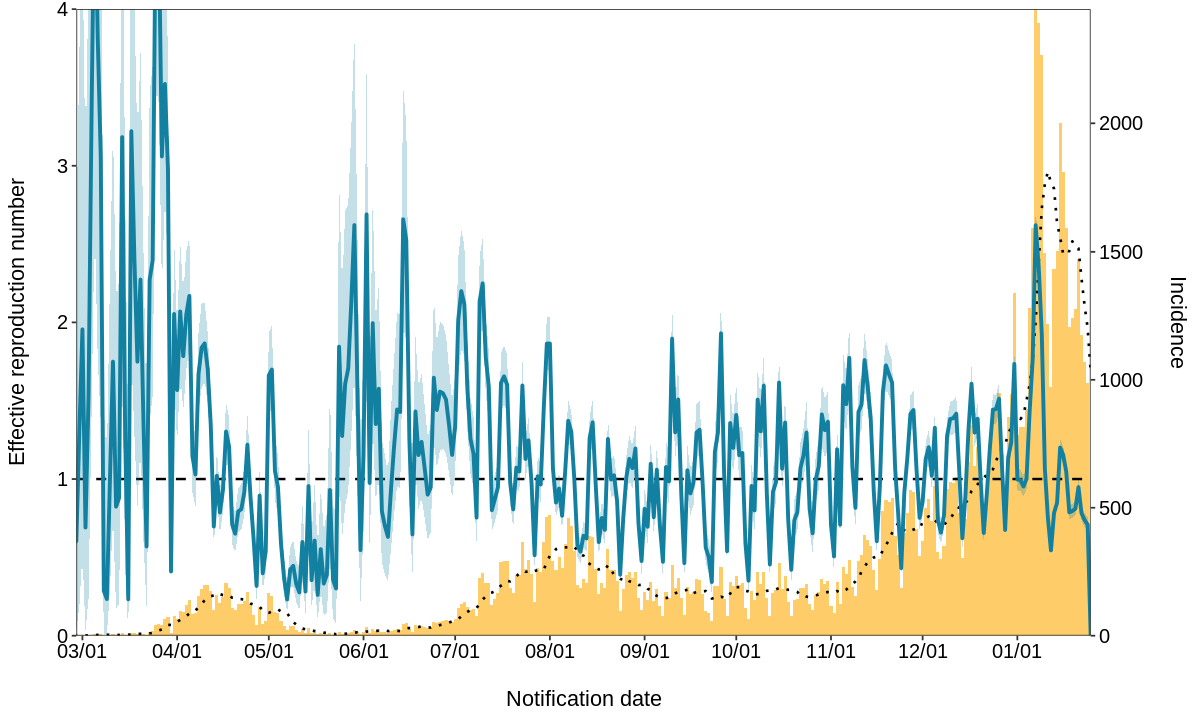

In [ ]:
Rt_max = 4
scaling_parameter=max(output$confirmed)/Rt_max
bincolor = "#fec44f"

output %>% 
  ggplot(aes(x=date)) +
    geom_bar(aes(y=confirmed/scaling_parameter), stat='identity', alpha=.85, color=NA, size=0, width=1, fill=bincolor) +
    geom_line(aes(y=confirmed_rolling_average/scaling_parameter), color="black", size=.75, linetype='dotted') +
    geom_hline(yintercept=1, linetype="dashed", color = "black", size = 0.7) + 
    geom_line(aes(y=Rt), color="#1380A1", size=1.1) +
    #geom_line(aes(y=Rt_lower), linetype='dotted') + 
    #geom_line(aes(y=Rt_upper), linetype='dotted') +
    geom_ribbon(aes(ymax=Rt_upper, ymin=Rt_lower), fill="#1380A1", alpha = 0.25) +
    coord_cartesian(ylim=c(0, Rt_max), xlim=c(as.Date("2020-02-28"), max(output$date))) +
    labs(x="\nNotification date", y="Effective reproduction number\n") +
    scale_x_date(date_labels="%m/%d",date_breaks  = "1 month", expand = c(0, 0)) +
    scale_y_continuous(limit=c(0,620), expand = c(0, 0),
                           sec.axis = sec_axis(~.*scaling_parameter, name = "Incidence\n")) +
    theme_bw() + 
    theme(text = element_text(size=13, family="sans", color="black"),
      axis.text = element_text(size=12, family="sans", color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") 

## 2. **More reliable**: using rolling average

In [ ]:
# Stan program
stan_code = "functions {
    /* calculating the convolutions */
    // X: first function, Yrev: reversed version of the second function
    // K: length of X and Yrev
    // the result is the vector of length K-1, because the first element equal zero is omitted
    vector convolution(vector X, vector Yrev, int K) {
        vector[K-1] res;
        res[1] = X[1]*Yrev[K];
        for (k in 2:K-1) 
            res[k] = dot_product(head(X, k), tail(Yrev, k)); // by definition of the convolution

        return res;        
    }
}

data {
 int<lower = 1> K; // number of days
 vector<lower = 0>[K] cases; // which is not integer anymore

 // Serial interval
 real param1_SI;
 real param2_SI;
}

transformed data {
  vector[K-1] conv;

  {
    vector[K] gt;
    vector[K] gt_rev; 

    // calculating the discrete version of the weibull distribution
    vector[K] gt_cdf;
    for (i in 1:K) 
      gt_cdf[i] = exp(weibull_lcdf(i | param1_SI, param2_SI));
    gt = append_row(gt_cdf[1], gt_cdf[2:K] - gt_cdf[1:(K-1)]);

    // reverting
    for (i in 1:K)
      gt_rev[i] = gt[K + 1 - i];

    conv = convolution(to_vector(cases), gt_rev, K);
  }
}

parameters {
  // the vector of instantaneous reproduction numbers 
  vector<lower = 0>[K-1] Rt;
}

model {
  // prior distribution
  // if we take flat (non-informative prior), then we would obtain exactly MLE
  Rt ~ normal(2.4, 2.0);

  target += gamma_lpdf(to_vector(tail(cases, K-1)) | Rt .* conv + 1e-8, 1.0);
  // but in this case the counts are not integers anymore, so we may use the approximation
  // of poisson by gamma distribution
}"
stan_file = write_stan_file(stan_code)

# data file
data_list = list(K = nrow(Df), cases = Df$confirmed_rolling_average, param1_SI = 2.305, param2_SI = 5.452)
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

# Compile example model
mod = cmdstan_model(stan_file)

# Condition on data
## seed number is used for possible reproducibility
fit = mod$sample(data = data_file, iter_sampling=1000, iter_warmup=500, chains=3, seed=123) 

Compiling Stan program...



Running MCMC with 3 sequential chains...

Chain 1 Iteration:    1 / 1500 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Shape parameter[62] is inf, but must be finite! (in '/tmp/RtmpU3qKTe/model-41449aef63.stan', line 56, column 2 to column 77)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Shape parameter[334] is inf, but must be finite! (in '/tmp/RtmpU3qKTe/model-41449aef63.stan', line 56, column 2 to column 77)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occur

Chain 1 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 1 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 1 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 1 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 1 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 1 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 1 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 1 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 1 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 1 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 1 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 1 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 1 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 1 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 1 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 1 finished in 3.2 seconds.
Chain 2 Iteration:    1 / 1500 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Shape parameter[61] is inf, but must be finite! (in '/tmp/RtmpU3qKTe/model-41449aef63.stan', line 56, column 2 to column 77)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Shape parameter[336] is inf, but must be finite! (in '/tmp/RtmpU3qKTe/model-41449aef63.stan', line 56, column 2 to column 77)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occur

Chain 2 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 2 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 2 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 2 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 2 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 2 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 2 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 2 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 2 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 2 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 2 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 2 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 2 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 2 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 2 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 2 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 2 finished in 3.0 seconds.
Chain 3 Iteration:    1 / 1500 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Shape parameter[62] is inf, but must be finite! (in '/tmp/RtmpU3qKTe/model-41449aef63.stan', line 56, column 2 to column 77)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Shape parameter[340] is inf, but must be finite! (in '/tmp/RtmpU3qKTe/model-41449aef63.stan', line 56, column 2 to column 77)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occur

Chain 3 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 3 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 3 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 3 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 3 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 3 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 3 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 3 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 3 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 3 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 3 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 3 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 3 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 3 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 3 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 3 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 3 finished in 3.1 seconds.

All 3 chains finished successfully.
Mean chain execution time: 3.1 seconds.
Total execution time: 9.5 seconds.


In [ ]:
output_ = fit$summary(c("Rt"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output_) = c("variable", "Rt", "Rt_lower", "Rt_upper")
out = stringr::str_match_all(output_$variable, "[\\d+(.*)]")
output_$index = sapply(out, function(x) as.numeric(paste(x[,1],collapse="")))
output_ %>% 
  mutate(variable = stringr::str_extract(variable, "^[^\\[]+"), date = mindate + index) %>% 
  select(variable, date, everything(), -index, -variable) %>% right_join(Df, by='date') -> output
output %>% head

,date,Rt,Rt_lower,Rt_upper,confirmed,deaths,confirmed_rolling_average
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-25,3.785795,0.9874860,7.328589,1,0,1.0000000
2,2020-01-26,3.701280,1.0300063,7.152049,0,0,0.6666667
3,2020-01-27,3.198305,0.7109925,6.397346,0,0,0.5000000
4,2020-01-28,2.596935,0.6372391,5.525162,0,0,0.4000000
5,2020-01-29,2.099085,0.4230159,4.742013,0,0,0.3333333
6,2020-01-30,2.059115,0.4477146,4.676088,1,0,0.4285714


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


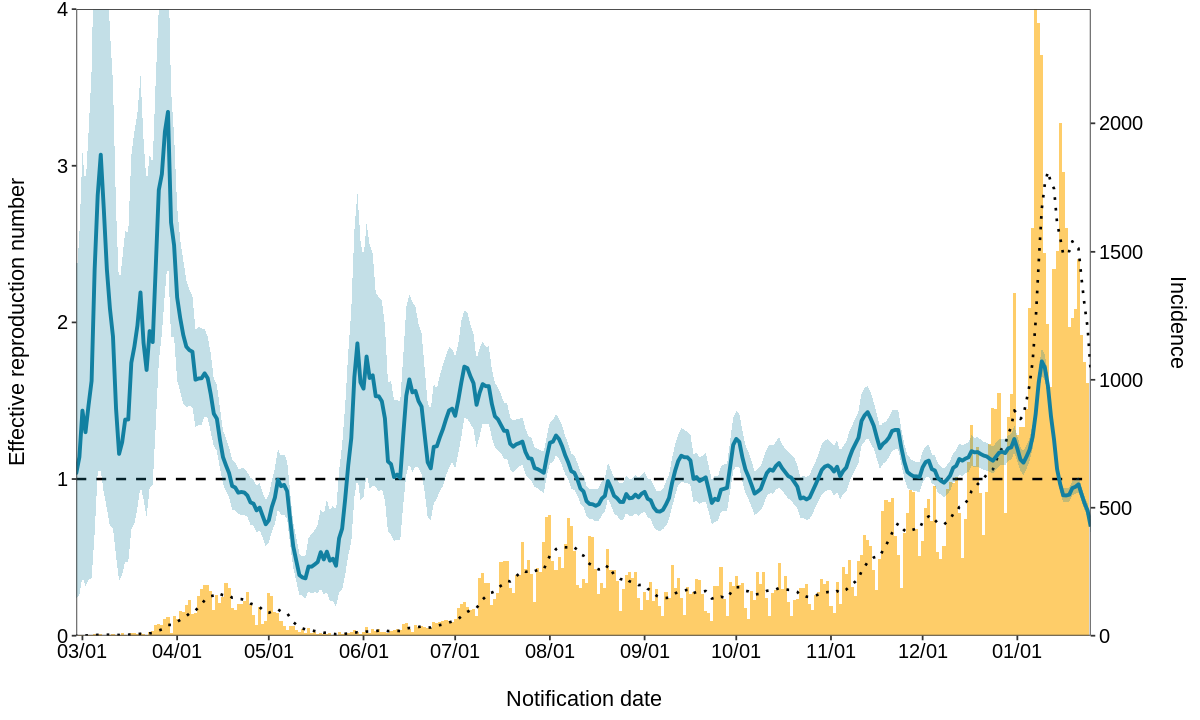

In [ ]:
Rt_max = 4
scaling_parameter=max(output$confirmed)/Rt_max
bincolor = "#fec44f"

output %>% 
  ggplot(aes(x=date)) +
    geom_bar(aes(y=confirmed/scaling_parameter), stat='identity', alpha=.85, color=NA, size=0, width=1, fill=bincolor) +
    geom_line(aes(y=confirmed_rolling_average/scaling_parameter), color="black", size=.75, linetype='dotted') +
    geom_hline(yintercept=1, linetype="dashed", color = "black", size = 0.7) + 
    geom_line(aes(y=Rt), color="#1380A1", size=1.1) +
    geom_ribbon(aes(ymax=Rt_upper, ymin=Rt_lower), fill="#1380A1", alpha = 0.25) +
    coord_cartesian(ylim=c(0, Rt_max), xlim=c(as.Date("2020-02-28"), max(output$date))) +
    labs(x="\nNotification date", y="Effective reproduction number\n") +
    scale_x_date(date_labels="%m/%d",date_breaks  = "1 month", expand = c(0, 0)) +
    scale_y_continuous(limit=c(0,620), expand = c(0, 0),
                           sec.axis = sec_axis(~.*scaling_parameter, name = "Incidence\n")) +
    theme_bw() + 
    theme(text = element_text(size=13, family="sans", color="black"),
      axis.text = element_text(size=12, family="sans", color="black"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      legend.position = "none") 

# Some additional reading about this

1. Gostic et al paper on reproduction number https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008409
2. Imperial College London Stan code (please check how they write convolution) https://github.com/ImperialCollegeLondon/covid19model/blob/master/stan-models/base.stan 